#### **LSE Data Analytics Online Career Accelerator** 
#### Course 201: Data Analytics with Python

## Assignment Assignment: Covid data

The government is planning to launch marketing campaigns to promote the vaccine. The purpose of this analysis is to identify trends and patterns that they can use to inform their marketing approach to increase the number of fully vaccinated people. 


### 0) Environment preparation


In [24]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set(rc={'figure.figsize':(15,9)})
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error


%matplotlib inline

# Get multiple outputs in the same cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
 


### 1) Assignment activity 1: [Prepare your GitHub repository](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-1-prepare-your-github-repository?module_item_id=20647)



- [My Github Repo](https://github.com/Abdi-Farah12/LSE_DA_COVID_analysis)


!['My Github screenshot](https://user-images.githubusercontent.com/98043245/166459778-fbd5c3a3-1ae5-4d65-a766-682a4ab308ca.png)


### 2) Assignment activity 2: [Import and explore data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-2-import-and-explore-the-data?module_item_id=20648)



In [3]:
# Import the CSV file with Pandas and convert 'Date' to datetime
cov = pd.read_csv("covid_19_uk_cases.csv", index_col=['Date'], parse_dates=['Date'])
vac = pd.read_csv("covid_19_uk_vaccinated.csv", index_col=['Date'], parse_dates=['Date'])


#### 2.1 Explore the shape of the Covid cases dataset

##### The following cells will:

a) Check the shape of the data and detect and remove any missing values
   

In [4]:
# Shape of the data
print(cov.shape)
print(cov.info)
cov.describe()
print(cov.dtypes)
#cov.columns

(7584, 11)
<bound method DataFrame.info of            Province/State  Country/Region      Lat     Long  \
Date                                                          
2020-01-22       Anguilla  United Kingdom  18.2206 -63.0686   
2020-01-23       Anguilla  United Kingdom  18.2206 -63.0686   
2020-01-24       Anguilla  United Kingdom  18.2206 -63.0686   
2020-01-25       Anguilla  United Kingdom  18.2206 -63.0686   
2020-01-26       Anguilla  United Kingdom  18.2206 -63.0686   
...                   ...             ...      ...      ...   
2021-10-10         Others  United Kingdom  55.3781  -3.4360   
2021-10-11         Others  United Kingdom  55.3781  -3.4360   
2021-10-12         Others  United Kingdom  55.3781  -3.4360   
2021-10-13         Others  United Kingdom  55.3781  -3.4360   
2021-10-14         Others  United Kingdom  55.3781  -3.4360   

           ISO 3166-1 Alpha 3-Codes                  Sub-region Name  \
Date                                                             

,Lat,Long,Intermediate Region Code,Deaths,Cases,Recovered,Hospitalised
count,7584.000000,7584.000000,7584.000000,7582.000000,7.582000e+03,7582.000000,7582.000000
mean,21.840267,-41.440047,12.500000,6210.202321,2.147082e+05,454.691242,685.228568
std,28.305518,30.527529,14.009849,24860.790148,1.007557e+06,1010.642337,819.256635
min,-51.796300,-81.254600,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,17.851075,-64.667625,0.000000,0.000000,1.200000e+01,0.000000,105.000000
50%,20.503650,-60.855483,2.500000,1.000000,1.685000e+02,13.000000,390.000000
75%,39.448675,-5.152225,29.000000,25.000000,1.585000e+03,312.000000,955.750000
max,55.378100,-2.364400,29.000000,138237.000000,8.317439e+06,8322.000000,4907.000000


Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Deaths                      float64
Cases                       float64
Recovered                   float64
Hospitalised                float64
dtype: object


In [6]:
# Detect NaN values in the dataframe
cov.isnull().sum()

# Replace Null values with 0
cov.fillna(0, inplace=True)

# Confirm NaN values replaced
cov.isnull().sum()

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Deaths                      0
Cases                       0
Recovered                   0
Hospitalised                0
dtype: int64

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Deaths                      0
Cases                       0
Recovered                   0
Hospitalised                0
dtype: int64

##### Observations

We see that there are 11 columns in total (including the datetimeindex). The first 6 columns in this dataframe are geographical indicators and province identification information. The remaining 4 (deaths,cases,recovered and hospitalised) contain the values that represent the figures for covid in the UK provinces.

##### The following cells will:

a) Create a subset of the data for the 'Others' Province and plot the the Deaths, Cases, Recovered and hospitalised columns on one line plot over time to sense check the numbers.

b) Count the number of rows recorded per province and the most common value recorded for each province using value_counts() 

In [7]:
# Create a subset of Cov DataFrame for 'Others'
others = cov[cov['Province/State']== 'Others']

others = others.loc[:,['Deaths','Cases','Recovered','Hospitalised']]
print(others.shape)


print(others.shape)


(632, 4)
(632, 4)


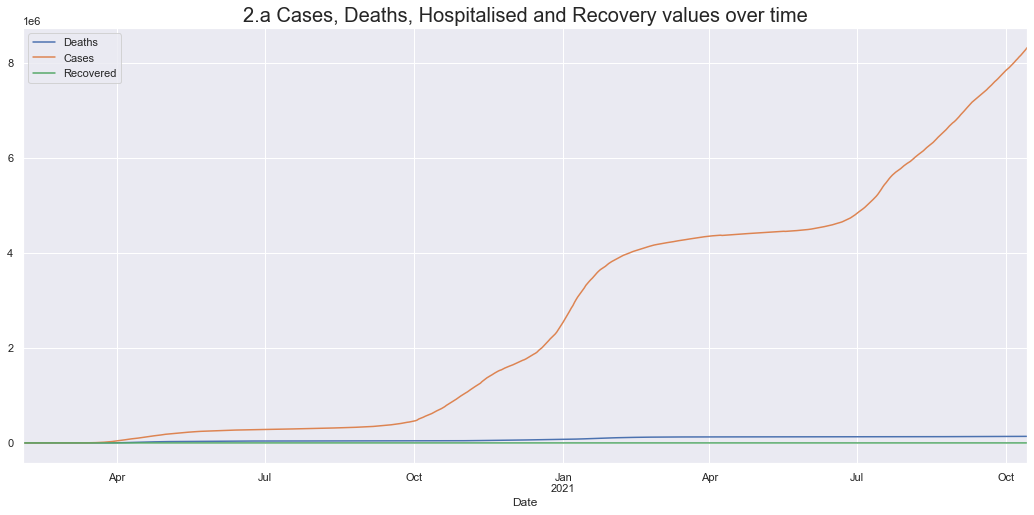

In [8]:
# Subset for 'Others' province
df1 = others.loc[:,['Deaths','Cases','Recovered','Hospitalised']]

# we use [12:] to skip the first 12 months
for col_name in df1.columns.values[0:3]:
     x = df1[col_name][12:].plot(figsize=(18, 8))


        
x = plt.legend(loc='best')
x = plt.title('2.a Cases, Deaths, Hospitalised and Recovery values over time', fontsize=20)
x = plt.show(block=False)

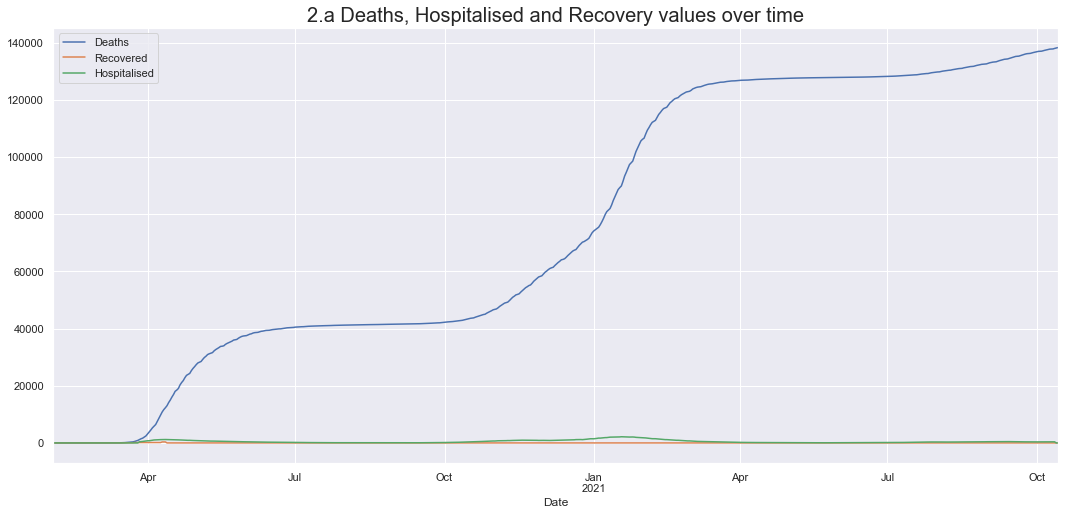

In [9]:
# Subset for 'Others' province
df1 = others.loc[:,['Deaths','Recovered','Hospitalised']]

# we use [12:] to skip the first 12 months
for col_name in df1.columns.values[0:3]:
     x = df1[col_name][12:].plot(figsize=(18, 8))


        
x = plt.legend(loc='best')
x = plt.title('2.a Deaths, Hospitalised and Recovery values over time', fontsize=20)
x = plt.show(block=False)

In [10]:
# Count of the number of values in a specified column of the DataFrame.
print(cov['Province/State'].value_counts())

# Count the number of the most commonly occuring value in the Recovered culumn
print(cov.groupby('Province/State')['Recovered'].apply(lambda x: x.value_counts().head(1)))

# Count the number of the most commonly occuring value in the Recovered culumn
print(cov.groupby('Province/State')['Hospitalised'].apply(lambda x: x.value_counts().head(1)))

Anguilla                                        632
Bermuda                                         632
British Virgin Islands                          632
Cayman Islands                                  632
Channel Islands                                 632
Falkland Islands (Malvinas)                     632
Gibraltar                                       632
Isle of Man                                     632
Montserrat                                      632
Saint Helena, Ascension and Tristan da Cunha    632
Turks and Caicos Islands                        632
Others                                          632
Name: Province/State, dtype: int64
Province/State                                    
Anguilla                                      3.0     230
Bermuda                                       0.0     137
British Virgin Islands                        0.0     151
Cayman Islands                                0.0     144
Channel Islands                               0.0     143


#### Observation

We can observe from figure 2.a that as expected the number of cases are significantly higher than the other metrics. With Figure 2.b I exclude Cases so as to get a clearer picture of how deaths, recoveries and hospitalisations compare. The results here are unusaul. The deaths figures are significantly higher than both recoveries and hospitalisations. In terms of recoveries, with cases numbers being as high as they are, it does not make sense for recoveries to be less than deaths. When we look at the value counts we notice that 571 of the 632 total rows have a value of 0 recorded for 'Others'suggesting that there is missing data in the Recovered column.

In terms of hospitalisations again we would expect that in the UK most deaths would occure in hospitals however the data suggests that the vast majority of people who have died did not die in hospital which is unlikely. This is leads me to conclude that the data on Hospitalisations is not reliable.


#### 2.2 Explore the shape of the Vaccinations dataset

##### The following cells will:

a) Check the shape of the vaccines data and detect and remove any missing values
   

In [11]:
print(vac.shape)
print(vac.info)
vac.describe()
vac.columns

(7584, 10)
<bound method DataFrame.info of            Province/State  Country/Region      Lat     Long  \
Date                                                          
2020-01-22       Anguilla  United Kingdom  18.2206 -63.0686   
2020-01-23       Anguilla  United Kingdom  18.2206 -63.0686   
2020-01-24       Anguilla  United Kingdom  18.2206 -63.0686   
2020-01-25       Anguilla  United Kingdom  18.2206 -63.0686   
2020-01-26       Anguilla  United Kingdom  18.2206 -63.0686   
...                   ...             ...      ...      ...   
2021-10-10         Others  United Kingdom  55.3781  -3.4360   
2021-10-11         Others  United Kingdom  55.3781  -3.4360   
2021-10-12         Others  United Kingdom  55.3781  -3.4360   
2021-10-13         Others  United Kingdom  55.3781  -3.4360   
2021-10-14         Others  United Kingdom  55.3781  -3.4360   

           ISO 3166-1 Alpha 3-Codes                  Sub-region Name  \
Date                                                             

,Lat,Long,Intermediate Region Code,Vaccinated,First Dose,Second Dose
count,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000
mean,21.840267,-41.440047,12.500000,5913.547600,6192.822257,5913.547600
std,28.305518,30.527529,14.009849,10846.410258,11439.883647,10846.410258
min,-51.796300,-81.254600,0.000000,0.000000,0.000000,0.000000
25%,17.851075,-64.667625,0.000000,0.000000,0.000000,0.000000
50%,20.503650,-60.855483,2.500000,0.000000,0.000000,0.000000
75%,39.448675,-5.152225,29.000000,8338.000000,7505.500000,8338.000000
max,55.378100,-2.364400,29.000000,69619.000000,94038.000000,69619.000000


Index(['Province/State', 'Country/Region', 'Lat', 'Long',
       'ISO 3166-1 Alpha 3-Codes', 'Sub-region Name',
       'Intermediate Region Code', 'Vaccinated', 'First Dose', 'Second Dose'],
      dtype='object')

In [13]:
# Detect NaN values in the dataframe
vac.isnull().sum()

# Replace Null values with 0
vac.fillna(0, inplace=True)

# Confirm NaN values replaced
vac.isnull().sum()

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Vaccinated                  0
First Dose                  0
Second Dose                 0
dtype: int64

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Vaccinated                  0
First Dose                  0
Second Dose                 0
dtype: int64

##### The following cells wil: 

• Aggregate vaccines DataFrame to see the total values for Vaccinated, First Dose and Second Dose grouped by province

• Create subset of the vaccinations dataframe for Gibraltar and plot the Vaccinated, First Dose and Second Dose columns.


In [14]:
# Aggregated sums for vaccinated, first dose and second dose grouped by province

# Vaccinated
print(vac.groupby('Province/State')['Vaccinated'].sum().reset_index(
).sort_values('Vaccinated', ascending=False))
                                                                             
# First Dose
print(vac.groupby('Province/State')['First Dose'].sum().reset_index(
).sort_values('First Dose', ascending=False))

# Second Dose
print(vac.groupby('Province/State')['Second Dose'].sum().reset_index(
).sort_values('Second Dose', ascending=False))


                                  Province/State  Vaccinated
6                                      Gibraltar     5606041
8                                     Montserrat     5157560
2                         British Virgin Islands     4933315
0                                       Anguilla     4709072
7                                    Isle of Man     4036345
5                    Falkland Islands (Malvinas)     3587869
3                                 Cayman Islands     3363624
4                                Channel Islands     3139385
11                      Turks and Caicos Islands     2915136
1                                        Bermuda     2690908
9                                         Others     2466669
10  Saint Helena, Ascension and Tristan da Cunha     2242421
                                  Province/State  First Dose
6                                      Gibraltar     5870786
8                                     Montserrat     5401128
2                       

##### Observations:

As the death and cases figures for 'Others' is very high I am working under the assumption that 'Others' represents the rest of the United Kingdom minus the small provinces represented in the two DataFrames. With that assumption I would expect the vaccination numbers to be consistent with population. However, the aggregated values for vaccinations do not support my assumption.

The values recorded by day flactuate up and down from day to day, suggesting that the attributed values are daily rather than cumulative. To confirm this I will create a subset for Gibraltar and plot Vaccinated, First Dose and Second Dose over time. 

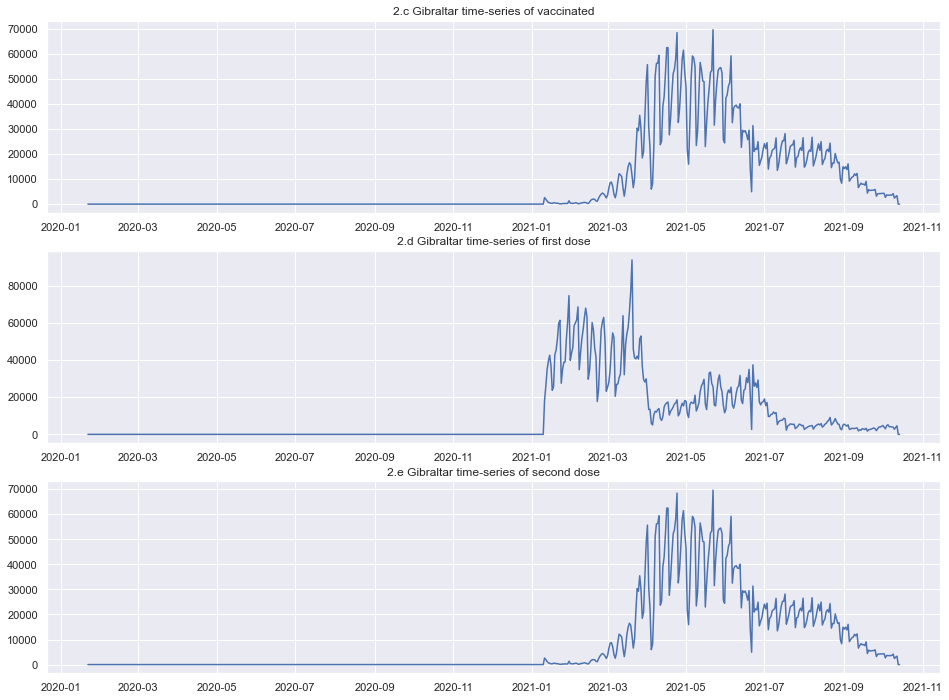

In [15]:
# Create a subset of the Vac DataFrame for Gibraltar

gibraltar_vac = vac[vac['Province/State']== 'Gibraltar']


# Plot time-series data for the columns.

fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(16,12))

# Vaccinated:
x = axes[0].plot(gibraltar_vac['Vaccinated'])
axes[0].title.set_text('2.c Gibraltar time-series of vaccinated')

# First Dose:
x = axes[1].plot(gibraltar_vac['First Dose'])
axes[1].title.set_text('2.d Gibraltar time-series of first dose')

# Second Dose:
x = axes[2].plot(gibraltar_vac['Second Dose'])
axes[2].title.set_text('2.e Gibraltar time-series of second dose')

plt.show()

##### Observations

As expected the visualisation confirms that the values attributed to the dates are not cummulative and are instead daily as they flactuate over time.

### 3) Assignment activities 3 and 4: [Merge and analyse the data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-3-merge-and-analyse-the-data?module_item_id=20649)

In order to tranform the data and create a dataset that will be used for the analysis, in the following cells we will drop the columns that will not be useful for the analysis. These columns include the geographical data columns in both data sets apart from Province/State and Country/Region. I will also drop the Recovered and Hospitalised columns from the Covid cases DataFrame as I have concluded through the cleaning process that the data in those columns is not reliable.

The following cells will:

a) Merge DataFrames and drop columns not being used. 

b) Create calculated columns to store the percentage differences in first dose and second vaccinations.

c) Analyse and visualise vaccine data

d) Analyse and visualise cases data



In [ ]:
# Drop columns not useful for the analysis
cov = cov.drop(['Lat','Long','ISO 3166-1 Alpha 3-Codes','Sub-region Name',
                'Intermediate Region Code','Recovered','Hospitalised'], axis=1)
vac = vac.drop(['Lat','Long','ISO 3166-1 Alpha 3-Codes','Sub-region Name',
                'Intermediate Region Code'], axis=1)

# Merge the two DataFrames
final_table = pd.merge(cov, vac, on=['Date','Province/State','Country/Region'], how='left')

print(final_table.shape)
print(final_table.dtypes)
print(final_table.info)
final_table.head()

In [18]:
# Ratio of people who have taken both the first and second dose thus fully vaccinated
final_table['Two Doses'] = (final_table ['Second Dose'] * 
                                       100) / final_table['First Dose']
# Ratio of people who have only taken the first dose
final_table['One Dose'] = (final_table['First Dose'] - final_table['Second Dose'])* 100 / final_table['First Dose']

# Replace NaN values with 0
final_table.fillna(0, inplace=True)

final_table.head()

,Province/State,Country/Region,Deaths,Cases,Vaccinated,First Dose,Second Dose,Two Doses,One Dose
Date,,,,,,,,,
2020-01-22,Anguilla,United Kingdom,0.0,0.0,0,0,0,0.0,0.0
2020-01-23,Anguilla,United Kingdom,0.0,0.0,0,0,0,0.0,0.0
2020-01-24,Anguilla,United Kingdom,0.0,0.0,0,0,0,0.0,0.0
2020-01-25,Anguilla,United Kingdom,0.0,0.0,0,0,0,0.0,0.0
2020-01-26,Anguilla,United Kingdom,0.0,0.0,0,0,0,0.0,0.0


##### The following cells will:

a) Create a vaccinations ratio DataFrame grouped by Province/State and aggregted by First Dose and Second Dose.     The DataFrame will have calculated columns for the total first dose and second dose vaccinations for each province.
   
b) Descriptive statistical analysis of the total values for the regions

c) Plot the total values


In [19]:
# group df by the sums of first dose and second dose
vax_ratios = final_table.groupby('Province/State')[['First Dose', 'Second Dose']].sum()

# Ratio of people who have taken both the first and second dose thus fully vaccinated
vax_ratios['Two Doses'] = (vax_ratios['Second Dose'] * 100) / vax_ratios['First Dose']

# Ratio of people who have only taken the first dose
vax_ratios['One Dose'] = (vax_ratios['First Dose'] - vax_ratios['Second Dose'])* 100 / vax_ratios['First Dose']

#Reset index 
vax_ratios.reset_index(inplace=True)

vax_ratios

,Province/State,First Dose,Second Dose,Two Doses,One Dose
0,Anguilla,4931470,4709072,95.490229,4.509771
1,Bermuda,2817981,2690908,95.490637,4.509363
2,British Virgin Islands,5166303,4933315,95.490237,4.509763
3,Cayman Islands,3522476,3363624,95.490331,4.509669
4,Channel Islands,3287646,3139385,95.490360,4.509640
5,Falkland Islands (Malvinas),3757307,3587869,95.490440,4.509560
6,Gibraltar,5870786,5606041,95.490468,4.509532
7,Isle of Man,4226984,4036345,95.489952,4.510048
8,Montserrat,5401128,5157560,95.490423,4.509577
9,Others,2583151,2466669,95.490701,4.509299


### Analysing the Vaccines data

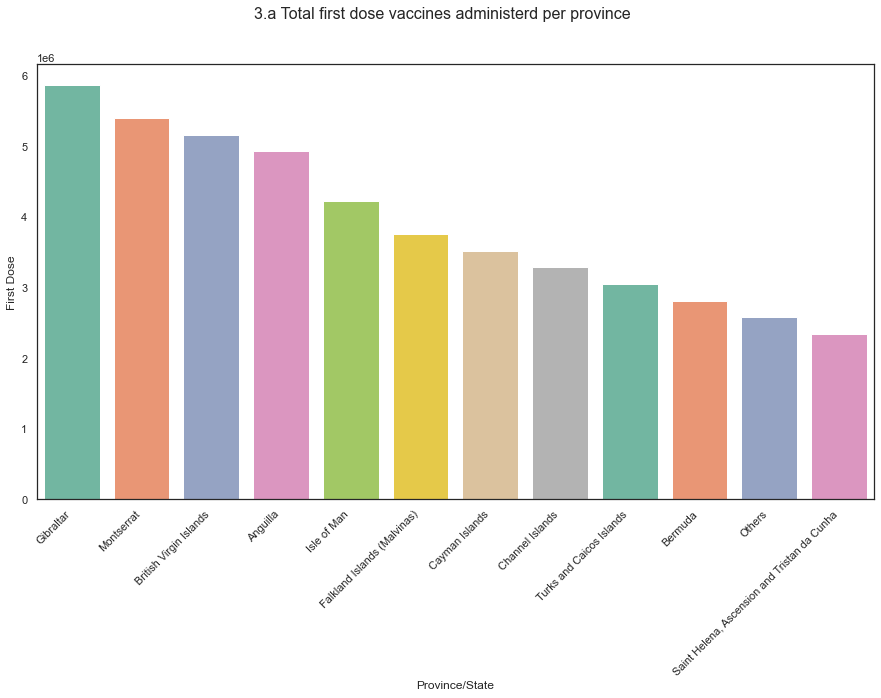

In [20]:
# Barplot to visualise the total first dose vaccinations
x = plt.figure(figsize=(15,8))
sns.set(style='white')

# Order the plot by province total
plot_order = vax_ratios.groupby('Province/State')['First Dose'].sum().sort_values(ascending=False).index.values

#create stacked bar chart
x = sns.barplot(x='Province/State', y='First Dose', data=vax_ratios,order=plot_order, palette='Set2')

# Plot asthetics
x = plt.suptitle("3.a Total first dose vaccines administerd per province", fontsize=16)
var = plt.xticks(rotation=45,ha="right")
fig.savefig('total_vax.png')

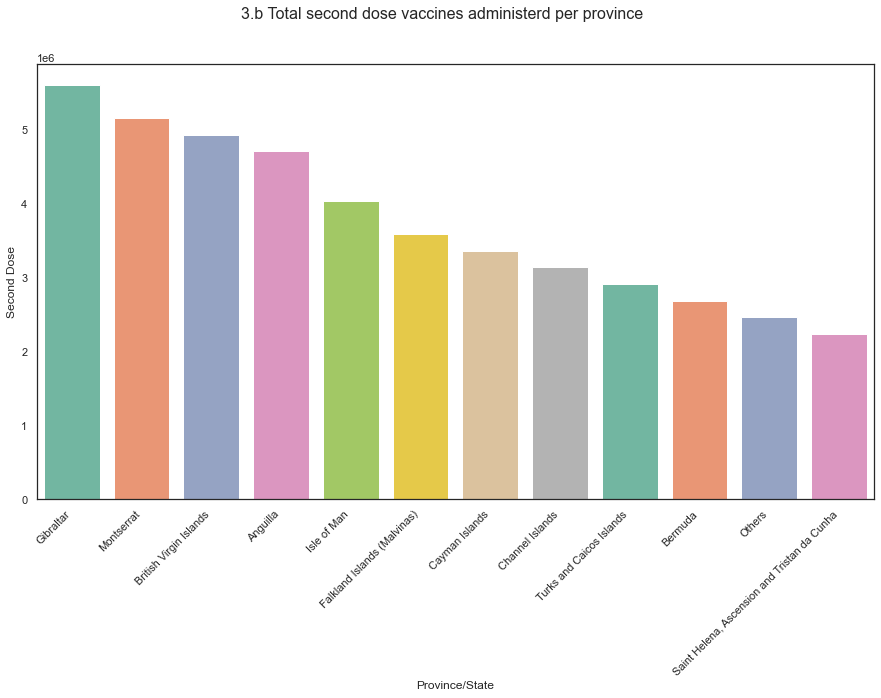

In [21]:
# Barplot to visualise the total first dose vaccinations
x = plt.figure(figsize=(15,8))
sns.set(style='white')

# Order the plot by province total
plot_order = vax_ratios.groupby('Province/State')['Second Dose'].sum().sort_values(ascending=False).index.values

#create stacked bar chart
x = sns.barplot(x='Province/State', y='Second Dose', data=vax_ratios,order=plot_order, palette='Set2')

# Plot asthetics
x = plt.suptitle("3.b Total second dose vaccines administerd per province", fontsize=16)
x = var = plt.xticks(rotation=45,ha="right")

In [22]:
# Descriptive analysis of the totals ands percentage vaccination values for provinces

vax_ratios.describe()


,First Dose,Second Dose,Two Doses,One Dose
count,1.200000e+01,1.200000e+01,12.000000,12.000000
mean,3.913864e+06,3.737362e+06,95.490375,4.509625
std,1.186194e+06,1.132699e+06,0.000282,0.000282
min,2.348310e+06,2.242421e+06,95.489878,4.509158
25%,2.994112e+06,2.859079e+06,95.490235,4.509490
50%,3.639892e+06,3.475746e+06,95.490392,4.509608
75%,4.990178e+06,4.765133e+06,95.490510,4.509765
max,5.870786e+06,5.606041e+06,95.490842,4.510122


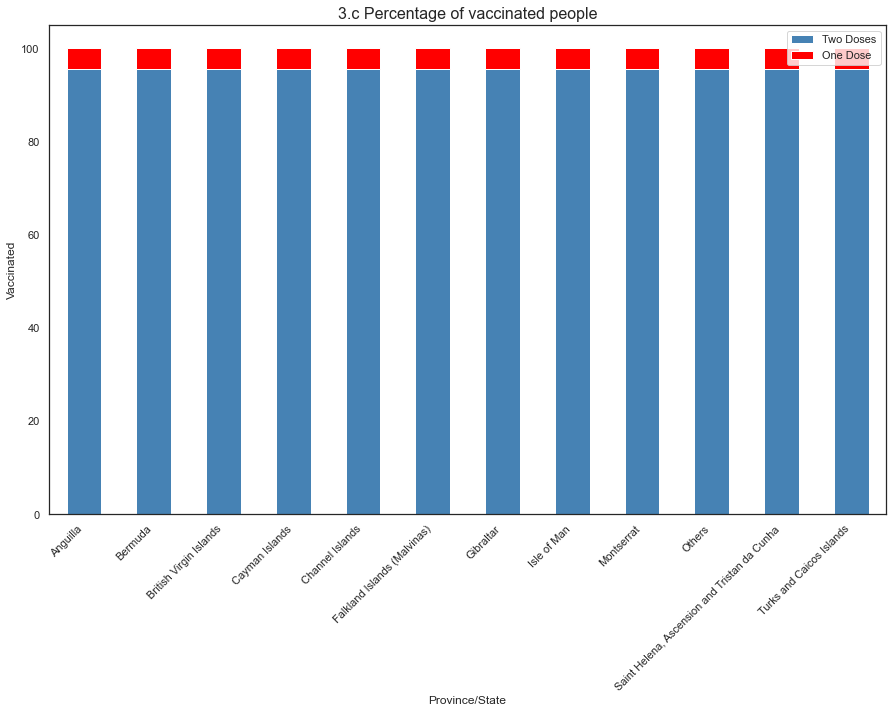

In [26]:
# Stacked barplot of the percentage difference in one dose and two dose vaccinations
sns.set(rc={'figure.figsize':(15,9)})
sns.set(style='white')

# Create a df to plot percentage totals of vaccination difference
df = vax_ratios.loc[:,['Province/State','Two Doses','One Dose']]

#create stacked bar chart
x = df.set_index('Province/State').plot(kind='bar', stacked=True, color=['steelblue', 'red'])

#add overall title
x = plt.title('3.c Percentage of vaccinated people', fontsize=16)

#add axis titles
x = plt.xlabel('Province/State')
x = plt.ylabel('Vaccinated')

#rotate x-axis labels
var = plt.xticks(rotation=45,ha="right")

#### Observations:

The totals barplots (figure 3.a and 3.b) show that in terms of absolute values Gibraltar has the highest number of both first dose and second dose vaccinations. What is more interesting in this visualisation is that 'Others' despite having the highest covid cases and deaths has the second lowest first dose and second dose vaccinations.

The province totals are normally dispersed however the standard deviation for the percentage difference between One dose and Two doses is 0.000282(%) implying that there is insignificantly low dispersion and that the data is almost identical in relative values. Considering that the absolute values are high such low dispersion in the percentages seems unlikely in a real-life scenario.

The following cells will:

a) Resample the absolute values for first dose, second dose vaccinations to monthly values and plot over time
   
b) Resample percentage change in one dose and two dose vacinations to monthly values and plot over time


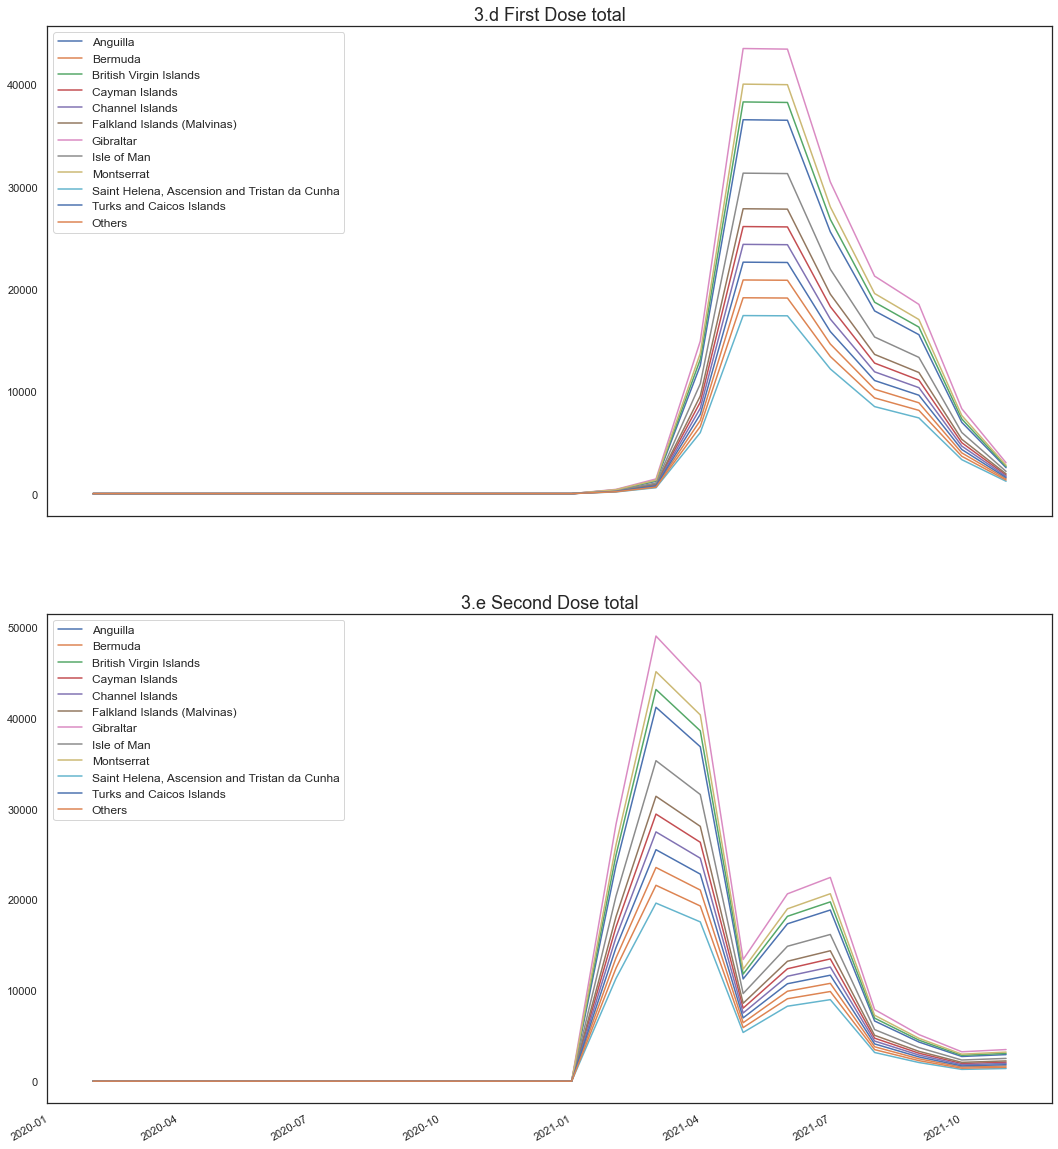

In [27]:
# line plot over time of total values for the Provinces
fig, (ax1, ax2) = plt.subplots(2,figsize=(18,22))
plt.rcParams["image.cmap"] = "Dark2"


# Loop the get the provinces names and resample to Month to visualise Monthly values
for Province in final_table['Province/State'].unique():
    temp_df = final_table[(final_table['Province/State'] == Province)]
    df_smooth = temp_df.resample('M').mean()

# Plot totals
    a = ax2.plot('First Dose', data=df_smooth, label=Province)
    b =ax1.plot('Second Dose', data=df_smooth, label=Province)

# Plot asthetics
x = ax2.legend(loc='upper left', prop={'size': 12})
x = ax1.legend(loc='upper left', prop={'size': 12})
x = ax2.set_title("3.e Second Dose total", fontsize=18)
x = ax1.set_title("3.d First Dose total", fontsize=18)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
fig.autofmt_xdate()

#### Observation

We can observe in the two plots above, apart from differences in totals, there is no observable difference in trend or pattern.

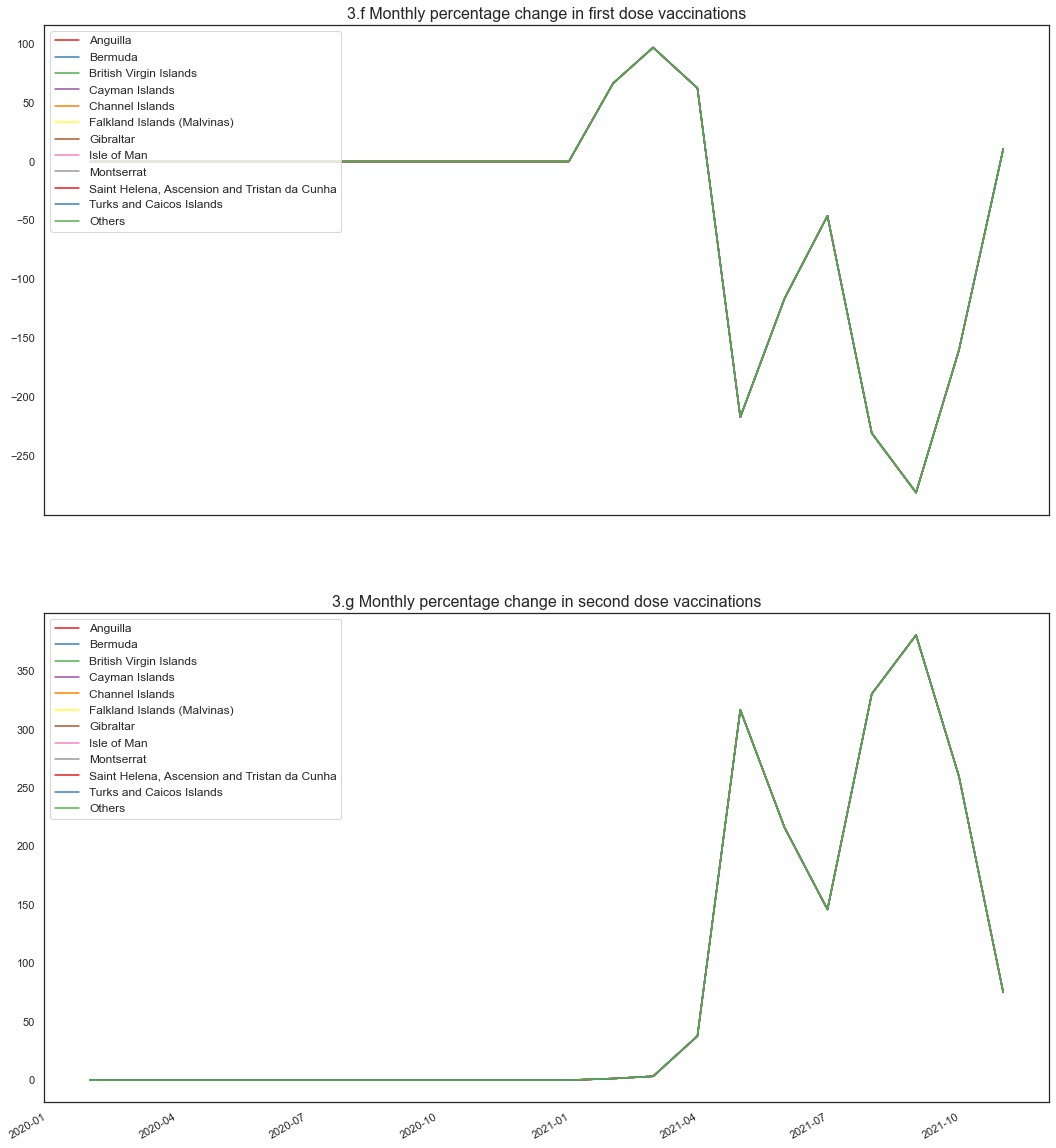

In [28]:
# Plot percentage differences for the Provinces over time
fig, (ax1, ax2) = plt.subplots(2,figsize=(18,22))
plt.rcParams["image.cmap"] = "Dark2"

# Loop the get the provinces names and resample to Month to visualise Monthly values
for Province in final_table['Province/State'].unique():
    temp_df = final_table[(final_table['Province/State'] == Province)]
    df_smooth = temp_df.resample('M').mean()

# Plot totals
    a = ax2.plot('Two Doses', data=df_smooth, label=Province)
    b = ax1.plot('One Dose', data=df_smooth, label=Province)

# Plot asthetics
x = ax2.legend(loc='upper left', prop={'size': 12})
x = ax1.legend(loc='upper left', prop={'size': 12})
x = ax2.set_title("3.g Monthly percentage change in second dose vaccinations", fontsize=16)
x = ax1.set_title("3.f Monthly percentage change in first dose vaccinations", fontsize=16)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
fig.autofmt_xdate()

#### Observation

Figures 3.f and 3.g above plot the monthly percentage change in One dose and Two dose vaccinations for all of the provinces on the same plot. 

For One dose vaccinations we can see from plot 3.f that there are negative values as a result of people taking the second dose. When compared with the second plot on Two doses we can see that as it peaks the first dose declines.

As discovered earlier due to the almost zero deviation, and thus very little dispersion in the data, when changes in percentages over time are plotted on the same plot for all the provinces the lines are tranposed on top of eachother.

##### Business question: Which provinces have the highest number (actual numbers) and highest relative numbers? (second dose only/first dose)

In terms of actual numbers Gibraltar has the highest number of fully vaccinated people. Turks and Caicos has the highest percentage of fully vaccinated people however the spread of the data here is 0.000282%.
 
Based on the analysis above the relative differences of vaccinations numbers do not provide insight that allows us to make recommendations as to which province should be targeted for first. The reason for this is that due to similarity in the relative differences we can not make a case for one province over another. However based on the absolute numbers 'Others' stands out when the number of vaccinations is compared with the total case numbers.



### Analysing Covid cases data

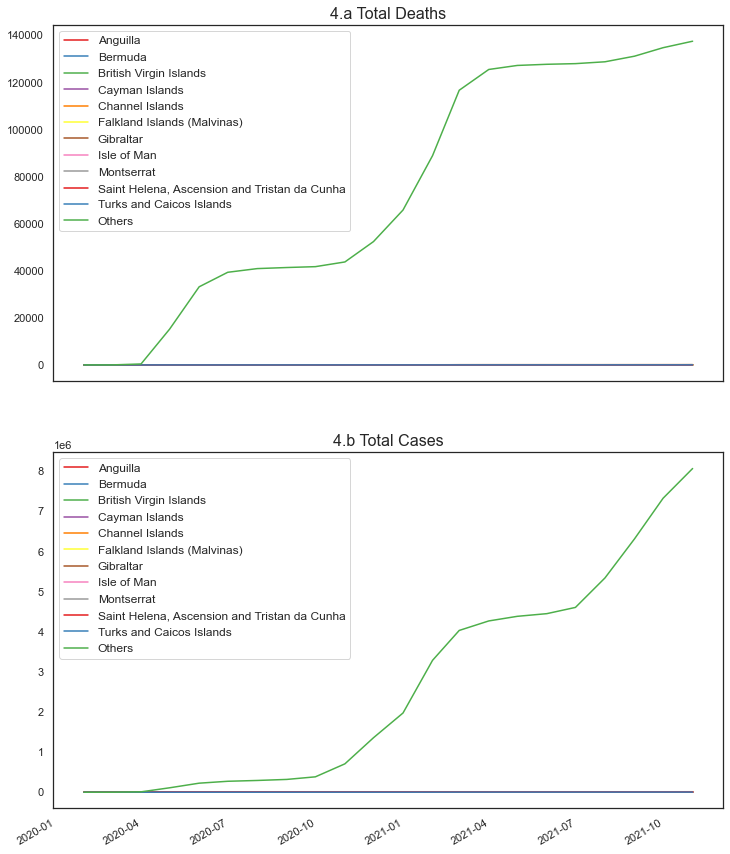

In [29]:
# Province totals for cases and deaths over time
fig, (ax1, ax2) = plt.subplots(2,figsize=(12,16))
plt.rcParams["image.cmap"] = "Dark2"

# Loop the get the provinces names and resample to Month to smooth the chart
for Province in final_table['Province/State'].unique():
    temp_df = final_table[(final_table['Province/State'] == Province)]
    df_smooth = temp_df.resample('M').mean()

# Plots for cases and deaths
    a = ax2.plot('Cases', data=df_smooth, label=Province)
    b = ax1.plot('Deaths', data=df_smooth, label=Province)

x = ax2.legend(loc='upper left', prop={'size': 12})
x = ax1.legend(loc='upper left', prop={'size': 12})
x = ax2.set_title("4.b Total Cases", fontsize=16)
x = ax1.set_title("4.a Total Deaths", fontsize=16)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
fig.autofmt_xdate()

#### Observation:

As we can see from figures 4.a and 4.b the 'Others' province distorts the chart as its values are significantly higher than the remaining provinces. As such, it is difficult to identify any patterns or trends for the smaller provinces.To overcome this I will exclude the 'Others' province and replot the values.

I will also group and aggregate the total values of the provinces and create a dataframe with the totals and percentage shares for deaths and cases. 

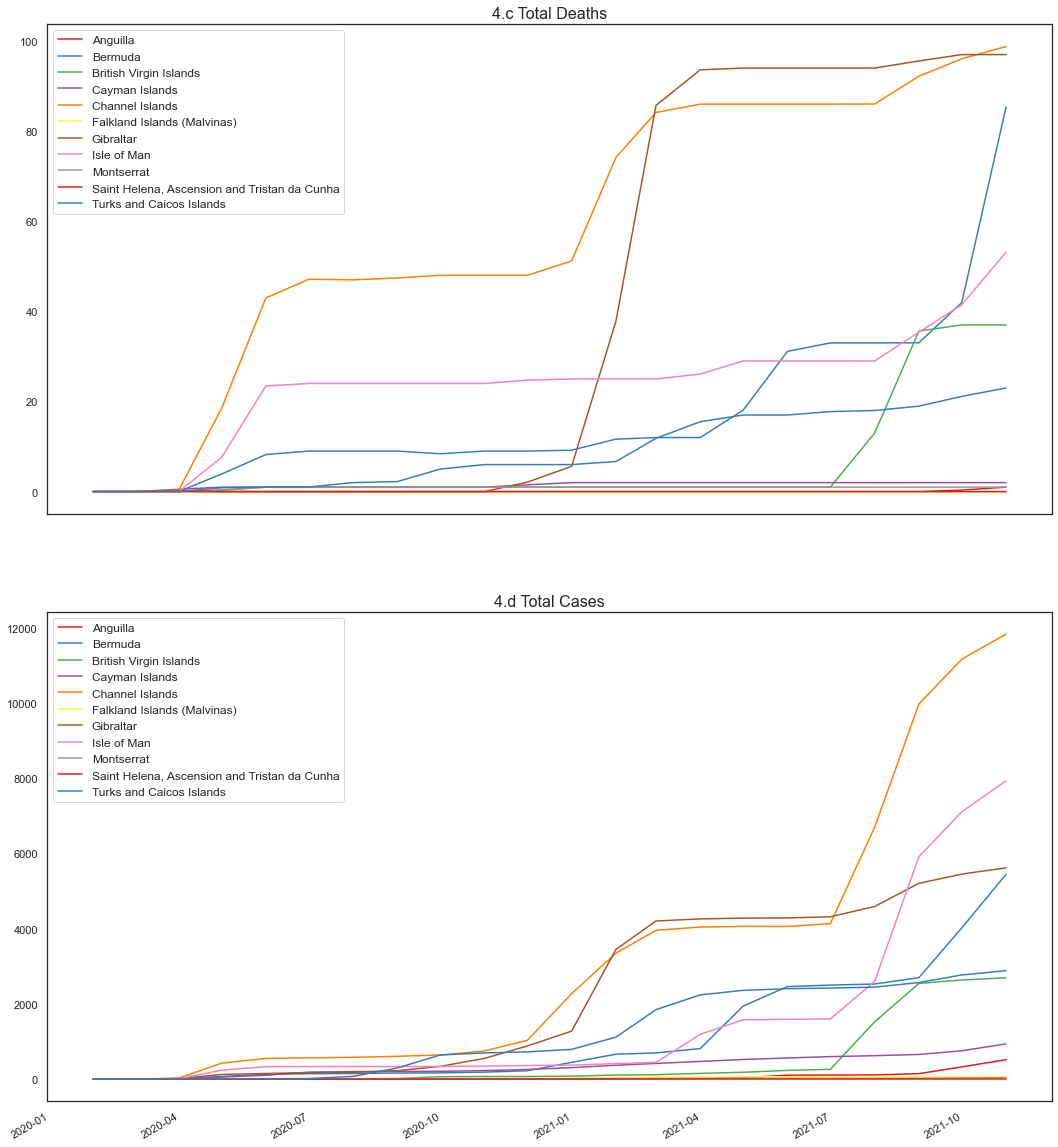

In [30]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(18,22))
plt.rcParams["image.cmap"] = "Dark2"

# Create df that excludes the 'Others' province
lesser_provinces = final_table[final_table['Province/State'] !='Others']

# Loop the get the provinces names and resample to Month to smooth the chart
for Province in lesser_provinces['Province/State'].unique():
    temp_df = lesser_provinces[(lesser_provinces['Province/State'] == Province)]
    df_smooth = temp_df.resample('M').mean()

# Plots for cases and deaths
    x = ax2.plot('Cases', data=df_smooth, label=Province)
    x = ax1.plot('Deaths', data=df_smooth, label=Province)

x = ax2.legend(loc='upper left', prop={'size': 12})
x = ax1.legend(loc='upper left', prop={'size': 12})
x = ax2.set_title("4.d Total Cases", fontsize=16)
x = ax1.set_title("4.c Total Deaths", fontsize=16)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
fig.autofmt_xdate()

In [31]:
# Group and aggregate total deaths
total_deaths = final_table.groupby(['Province/State'], 
sort=False, as_index=False)['Deaths'].max().sort_values('Deaths',ascending=False)

# Group and aggregate total cases
total_cases = final_table.groupby(['Province/State'], 
sort=False, as_index=False)['Cases'].max().sort_values('Cases',ascending=False)

# Calculate percentage of total deaths 
total_deaths ['% of total deaths'] = (total_deaths['Deaths'] / total_deaths['Deaths'].sum()) * 100

# Calculate percentage of total cases
total_cases['% of total cases'] = (total_cases['Cases'] / total_cases['Cases'].sum()) * 100

# Merge dfs
pd.merge(total_cases, total_deaths[["Province/State", "Deaths", "% of total deaths"]], on="Province/State", how="left")

,Province/State,Cases,% of total cases,Deaths,% of total deaths
0,Others,8317439.0,99.531424,138237.0,99.703566
1,Channel Islands,12135.0,0.145215,100.0,0.072125
2,Isle of Man,8343.0,0.099837,54.0,0.038948
3,Gibraltar,5727.0,0.068533,97.0,0.069961
4,Bermuda,5548.0,0.066391,95.0,0.068519
5,Turks and Caicos Islands,2910.0,0.034823,23.0,0.016589
6,British Virgin Islands,2725.0,0.032609,37.0,0.026686
7,Cayman Islands,1011.0,0.012098,2.0,0.001443
8,Anguilla,644.0,0.007706,1.0,0.000721
9,Falkland Islands (Malvinas),69.0,0.000826,0.0,0.000000


#### Observations

In terms of deaths, from figures 4.c and 4.d, we can see that the curve seems to have plateaued and is flattening only for Gibraltar, Turks and Caicos, and the British Virgin Islands. All of the other provinces are in clear upward trends and do not look like they have peaked yet. 

Of those provinces where deaths do not look to have peaked Bermuda and the Isle of Man have the steepest curve indicating that deaths are increasing at a fast rate.

In terms of positive cases the plot shows that cases in all provinces are in upward trends and we are yet to see a peak anywhere. Although still in an observable upward trend The British Virgin Islands and Turks and Caicos look to be the only provinces close to flattening.

The sharpest upward trends in positive case numbers are Bermuda and 'Others'. Both of these are interesting but for different reasons. Bermuda is interesting because it has one of the sharpest upward trends in both deaths and cases. On the other hand 'Others' is interesting as this province accounts for 99.5% of all cases and 99.7% of all deaths. As such, the sharp upward trend in cases is concerning.
  
The time-series plots above are cumulative values and as such are expected to increase overtime. The insights gained are limited to providing a general picture and is not enough to answer the business question. 

To better answer the business question; which province should be targeted first? We need to know the growth rate of cases across the different regions and compare these both numerically and over time. In this case I have made the decision to look at growth rates rather than death rates as the aim of the vaccine is to slow and stop the spread of the virus and here growth rate translates better. 

To achieve this the following cells will:

a) extract the new daily cases for provinces into a new column in the DataFrame using the .diff() function

b) calculate the growth rate by subtracting total cases from daily cases and multiplying by 100. This will give us a percentage growth.

c) calculate the average National and Province growth rates

d) compare the relative differences and plot on a timeseries.


In [32]:
# a) Create a new cases column in the DataFrame

# create a temp table for the new cases 
temp = final_table.groupby(['Province/State', 'Date', ])[['Cases']]
temp = temp.sum().diff().reset_index()
temp.loc['Cases'] = np.nan

# renaming columns
temp.columns = ['Province/State', 'Date', 'New_cases']

# merging new values
final_table = pd.merge(final_table, temp, on=['Province/State', 'Date'])

# filling na with 0
final_table = final_table.fillna(0)

# fixing data types
cols = ['New_cases']
final_table[cols] = final_table[cols].astype('int')

# loop to replace negative values
final_table['New_cases'] = final_table['New_cases'].apply(lambda x: 0 if x<0 else x)

# b) calculate the growth rate and store in a new column
final_table['Growth_rate'] = (final_table['New_cases'] / final_table['Cases']) *100

# filling na with 0
final_table['Growth_rate'].fillna(0, inplace=True)

# change index to date column
final_table.index = final_table['Date']

# drop extra date column 
final_table.drop(['Date'], axis = 1, inplace=True)

# Shape of df
final_table.head()
print(final_table.shape)

,Province/State,Country/Region,Deaths,Cases,Vaccinated,First Dose,Second Dose,Two Doses,One Dose,New_cases,Growth_rate
Date,,,,,,,,,,,
2020-01-22,Anguilla,United Kingdom,0.0,0.0,0,0,0,0.0,0.0,0,0.0
2020-01-23,Anguilla,United Kingdom,0.0,0.0,0,0,0,0.0,0.0,0,0.0
2020-01-24,Anguilla,United Kingdom,0.0,0.0,0,0,0,0.0,0.0,0,0.0
2020-01-25,Anguilla,United Kingdom,0.0,0.0,0,0,0,0.0,0.0,0,0.0
2020-01-26,Anguilla,United Kingdom,0.0,0.0,0,0,0,0.0,0.0,0,0.0


(7584, 11)


In [33]:
#c) National and Province average growth

# Average daily growth rate for the United Kingdom
print(final_table.groupby('Country/Region')['Growth_rate'].aggregate('mean'))

# Average daily growth for each province
final_table.groupby('Province/State')['Growth_rate']\
.aggregate('mean').reset_index().sort_values('Growth_rate', ascending=False)


Country/Region
United Kingdom    1.162568
Name: Growth_rate, dtype: float64


,Province/State,Growth_rate
9,Others,2.318293
4,Channel Islands,1.460100
1,Bermuda,1.422096
7,Isle of Man,1.336811
6,Gibraltar,1.334706
2,British Virgin Islands,1.158451
11,Turks and Caicos Islands,1.147914
3,Cayman Islands,1.110188
0,Anguilla,0.972750
5,Falkland Islands (Malvinas),0.689045


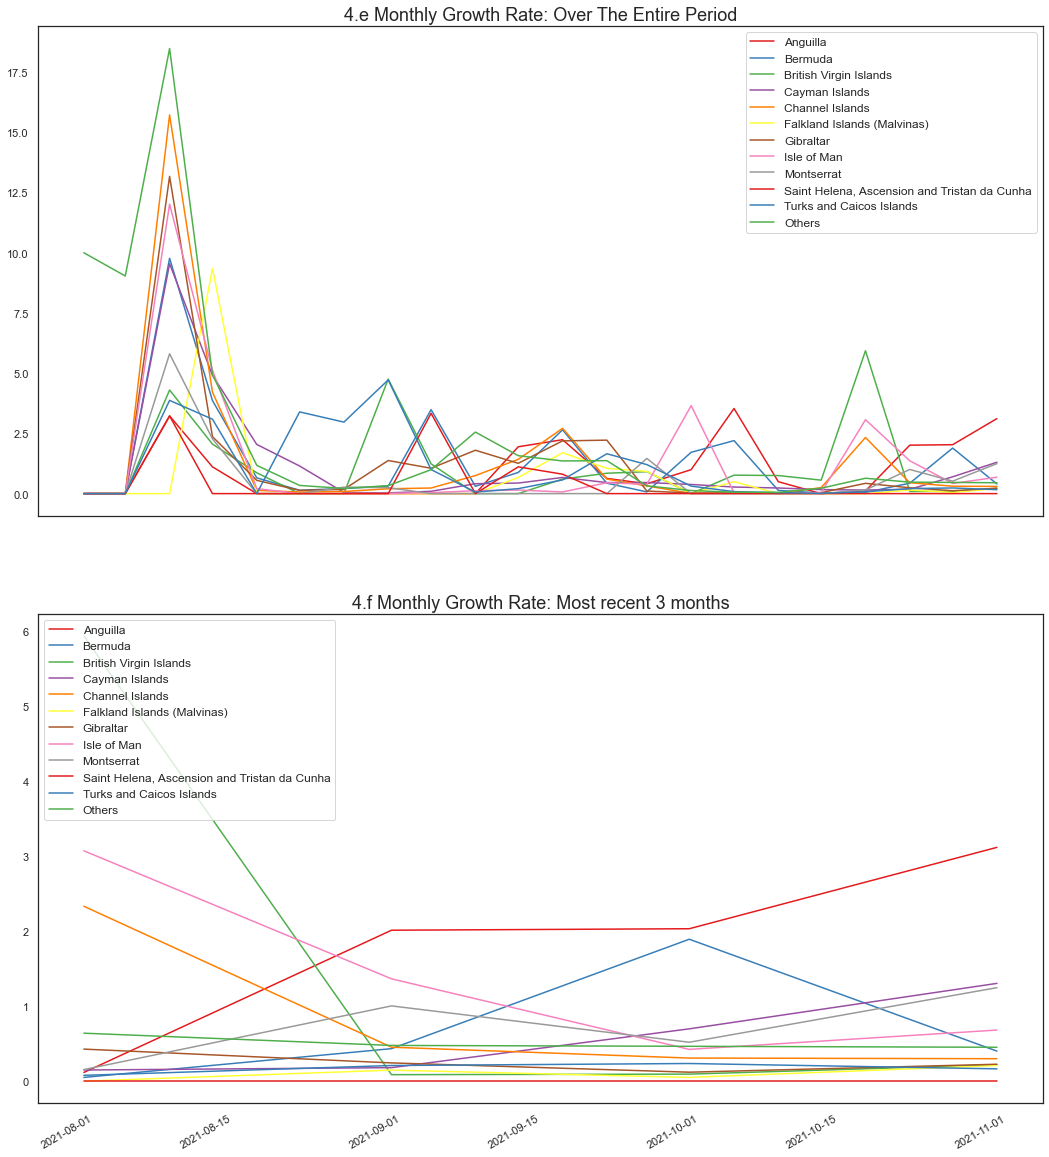

In [34]:
# Plot percentage growths for entire period and for most recent 3 months
fig, (ax1, ax2) = plt.subplots(2,figsize=(18,22))
plt.rcParams["image.cmap"] = "Dark2"

# Loop the get the provinces names and resample to Month to visualise Monthly values
for Province in final_table['Province/State'].unique():
    temp_df = final_table[(final_table['Province/State'] == Province)]
    monthly_growth = temp_df.resample('M').mean()

# Plot growth rate for the entire period and the last 3 months
    x = ax2.plot('Growth_rate', data=monthly_growth[18:23], label=Province)
    x = ax1.plot('Growth_rate', data=monthly_growth, label=Province)

# Plot asthetics
x = ax2.legend(loc='upper left', prop={'size': 12})
x = ax1.legend(loc='upper right', prop={'size': 12})
x = ax2.set_title("4.f Monthly Growth Rate: Most recent 3 months", fontsize=18)
x = ax1.set_title("4.e Monthly Growth Rate: Over The Entire Period", fontsize=18)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
fig.autofmt_xdate()

#### Observation

We can see from the aggregated averages that 'Others' has been growing at 2.3% per day throughout the pandemic which is more than double the national average rate.  

In figure 4.e we can see that there is a large peak in growth rate at the start of the pandemic followed by a sharp drop. This is due to the fact that at the start of the pandemic small changes in values result in high percentage growths. If the starting point is 0 then 1 new case represents a 100% growth rate. This also explains why the average growth rate for 'Others' is significantly higher than the national average as it is to be expected that there would be more cases due to its larger population

Figure 4.f represents the most recent 3 months, here we can see that Anguilla's growth is significantly higher than the other provinces. This can be attributed to very small case numbers. 'Others', British Virgin Islands, Channel Islands, Turks and Caicos, and Gibraltar are flat. Whilst Montserrat, Isle of Man and Cayman Islands are increasing.

Interestingly, the growth rate for Bermuda, which has the sharperst upward trends in both toal cases and deaths (as seen in figures 4.c and 4.d), is trending downwards.

##### Business question: Where should they target?

'Others' province accounts for over 99% of all deaths and cases but at the same time has the 3rd lowest vaccination totals. In terms of growth rate 'Others' is comaprable to the other provinces but due to the much higher numbers this translates to more cases and deaths. For that reason, with the data we have, I would tentativley recommend that the first awareness campiagn should be in the 'Others' provinces.

The dataset has a number of limitations without which we could be more confident in the findings. These include:

1. Missing values in values in the Recovered column
2. Unrliable data in the Hospitalised column
3. Suspeciosly high vaccination totals for provinces with small populations

Any suggestions for improvements and further analysis?
What would your future data requirements be?

##### Suggestions for future improvements

The datasets could be improved in both accuracy and detail. A more accurate dataset would provide more flexibility in the analysis for example if the Recovered and Hospitalised data was reliable in this dataset it would allow the analyst to look for patterns and trends in recovery rates and hospitalisation rates.

A more detailed dataset that includes the demographic details such as age groups and sex of people who have taken the vaccine would allow for more detailed analysis and better focused campaigns.

### 5) Assignment activity 5: External data: [Analyse the Twitter data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-5-analyse-the-twitter-data?module_item_id=21383)


In [35]:
# Import the dataset and check the shape
import warnings
warnings.filterwarnings('ignore')
tweets_2 = pd.read_csv('tweets_2.csv')

print(tweets_2.shape)
print(tweets_2.info())
tweets_2.head()

(100, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 100 non-null    object 
 1   id                         100 non-null    int64  
 2   id_str                     100 non-null    int64  
 3   text                       100 non-null    object 
 4   truncated                  100 non-null    bool   
 5   entities                   100 non-null    object 
 6   metadata                   100 non-null    object 
 7   source                     100 non-null    object 
 8   in_reply_to_status_id      8 non-null      float64
 9   in_reply_to_status_id_str  8 non-null      float64
 10  in_reply_to_user_id        11 non-null     float64
 11  in_reply_to_user_id_str    11 non-null     float64
 12  in_reply_to_screen_name    11 non-null     object 
 13  user                       100 non-null  

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,Mon Mar 21 21:45:28 +0000 2022,1506024218571464717,1506024218571464717,@Johnrashton47 When #diabetes has been the big...,True,"{'hashtags': [{'text': 'diabetes', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.505660e+18,1.505660e+18,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Mon Mar 21 21:31:13 +0000 2022,1506020629849391104,1506020629849391104,Disturbing figures from @fsb_policy @indparltr...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,4,3,False,False,en,False,NaN,NaN,NaN,NaN
2,Mon Mar 21 19:04:53 +0000 2022,1505983803822592004,1505983803822592004,NEW: #Stormont MLAs voted 57 ~ 25 to extend Do...,True,"{'hashtags': [{'text': 'Stormont', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,2,9,False,False,en,False,NaN,NaN,NaN,NaN
3,Mon Mar 21 18:39:58 +0000 2022,1505977533841481731,1505977533841481731,I'm do sick of coming on twitter to see the sa...,True,"{'hashtags': [{'text': 'borisOut', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Mon Mar 21 18:23:08 +0000 2022,1505973299502850052,1505973299502850052,The rollout of new #COVID19 #Booster jabs to #...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,0,1,False,False,en,False,NaN,NaN,NaN,NaN


In the following cell I will:

a) Create a subset of the data that takes only the 'text' column as we are only interested in the hashtags.

b) Use a lambda function to extract all the hashtags within the 'text' column.

c) Create a hashtags series that contains all of the extracted hashtags. I will also use th explode function to separate multiple hashtags in the same tweet to separate rows.

d) Clean the extracted hashtags regex so that we are only left with the keywords.


In [36]:
# Create subset dataframe of the text column
tweet_texts = tweets_2[['text']]

#Create a new column that captures the specific hashtags
tweet_texts["hashtags"] = tweet_texts.text.apply(lambda x: ([x for x in x.split(" ") if x.startswith("#")]))

# Seperate the hashtags in the same tweet and store it in a new df
hashtags = tweet_texts.explode('hashtags')

#Drop the text column so you have a pandas series with just the hashtags
hashtags.drop('text', axis=1, inplace=True)

# Clean the key words
hashtags['hashtags'] = hashtags['hashtags'].replace({'#':''}, regex=True)
hashtags = hashtags.dropna()
hashtags = hashtags["hashtags"]. str. lower() 


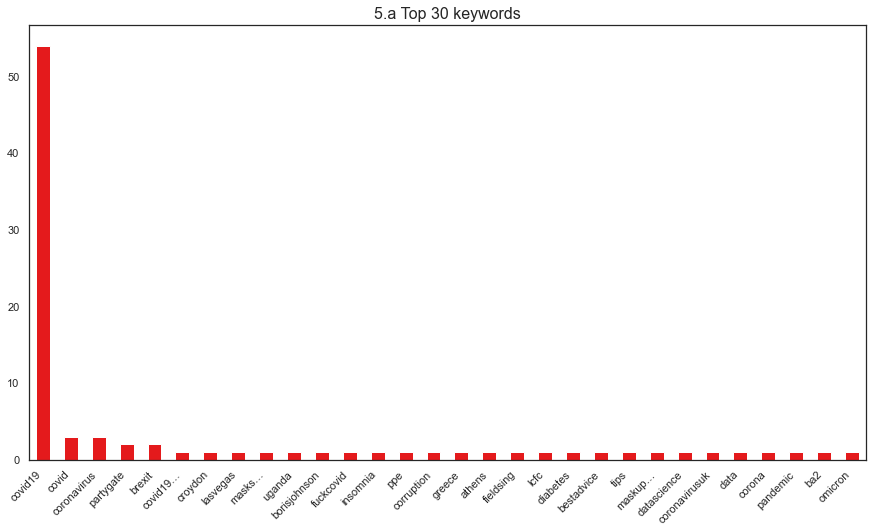

In [86]:
# Plot the top 30 keywords extracted from the hashtags
x = plt.figure(figsize=(15,8))

# Plot the top 30 hashtags
x = hashtags.value_counts().nlargest(30).plot(kind='bar')

x = plt.title('5.a Top 30 keywords', fontsize=16)
var = plt.xticks(rotation=45,ha="right")

In [37]:
# Convert the series into a df
hashtags_df = pd.DataFrame(hashtags)

# Search for vaccines in the hashtags DataFrame
hashtags_df[hashtags_df['hashtags'].apply(lambda x: 'vac' in x.lower())]

#print(hashtags_df[hashtags_df['hashtags'].apply(lambda x: 'vac' in x.lower())].count())


,hashtags
21,covidvaccination
38,vaccinations\n\ntoday


In this limited Dataframe we can observe that vaccines does not appear in the top 30 keywords. Furthmore, in the 98 keywords extrated variations of vaccine appear on only 2 occassions and only one of these appears along with covid.

Although we are not able to gain any real insight from the analysis of this particular dataset I feel that a much larger dataset consisting of trends in the specific provinces would provide a better understanding of twitter users sentiments towards the vaccine. 


### 6) Assignment activity 6: [Perform time-series analysis](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-6-perform-time-series-analysis?module_item_id=22584)

The analysis so far has shown that the most important region is 'Others' as it accounts for over 99% of boths deaths and cases. With this in mind the focus of the following time-series analysis on new cases will be focused on the 'Others' province.

#### The following cells will:

a) Create a subset of the data for 'Others' to use in the analysis

b) Plot a histogram of the distrubiton of daily cases

c) Detect and remove outliers and use a boxplot to show the range

d) Resample the DataFrame to months

e) Use provided provided function for moving averages and plot the timeseries for new cases using 1  month and 3 months moving averages.

In [38]:
# Create subset
df_1 = final_table[final_table['Province/State']=='Others']

(array([351.,  45.,  52.,  55.,  54.,  45.,  12.,   8.,   8.,   2.]),
 array([    0. ,  6805.3, 13610.6, 20415.9, 27221.2, 34026.5, 40831.8,
        47637.1, 54442.4, 61247.7, 68053. ]),
 <BarContainer object of 10 artists>)

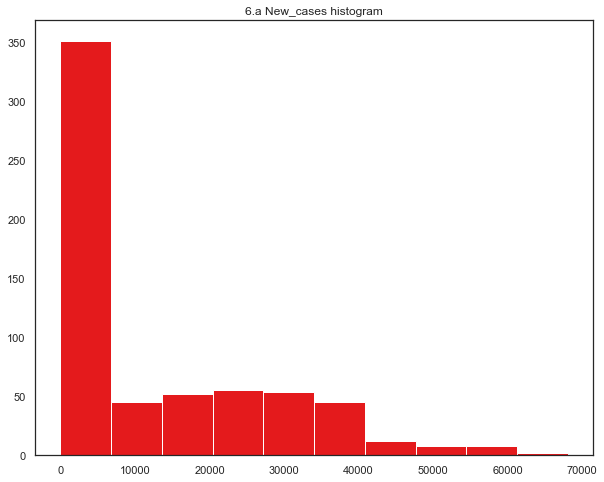

In [39]:
# Plot histogram
fig, axes = plt.subplots(figsize=(10,8))

axes.hist(df_1['New_cases'])
axes.title.set_text('6.a New_cases histogram')

In [40]:
# The columns you want to search for outliers in.
cols = ['New_cases'] 

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0,1) and not (0,100).
Q1 = df_1[cols].quantile(0.25) 
Q3 = df_1[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a Boolean array of the rows with (any) non-outlier column values.
condition = ~((df_1[cols] < (Q1 - 1.5 * IQR)) | (df_1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our DataFrame based on condition.
df_1_non_outlier = df_1[condition]
df_1_non_outlier.shape

New_cases    21771.75
dtype: float64

(626, 11)

Text(0.5, 1.0, '6.b New_cases boxplot')

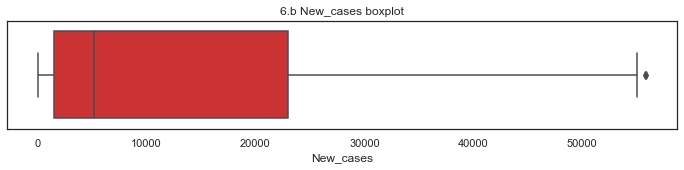

In [41]:
# Plot to see if outliers have been removed: 
# whis=multiplicative factor.
fig = plt.subplots(figsize=(12, 2))

ax = sns.boxplot(x=df_1_non_outlier['New_cases'],whis=1.5)
ax.set_title("6.b New_cases boxplot", fontsize=12)

In [42]:
# Resample the data set with 1 bedroom.
df_1_res = df_1_non_outlier.resample('M').mean()
df_1_res.head()
# Drop the missing values: 
df_1_res.dropna(inplace= True)
df_1_res.isna().sum()

,Deaths,Cases,Vaccinated,First Dose,Second Dose,Two Doses,One Dose,New_cases,Growth_rate
Date,,,,,,,,,
2020-01-31,0.000000,0.200000,0.0,0.0,0.0,0.0,0.0,0.200000,10.000000
2020-02-29,0.000000,20.896552,0.0,0.0,0.0,0.0,0.0,2.034483,9.034851
2020-03-31,404.838710,9071.322581,0.0,0.0,0.0,0.0,0.0,1239.451613,18.480283
2020-04-30,15208.066667,109999.133333,0.0,0.0,0.0,0.0,0.0,4635.300000,4.940373
2020-05-31,33171.322581,225037.322581,0.0,0.0,0.0,0.0,0.0,2535.548387,1.174006


Deaths         0
Cases          0
Vaccinated     0
First Dose     0
Second Dose    0
Two Doses      0
One Dose       0
New_cases      0
Growth_rate    0
dtype: int64

In [43]:
# Function to calculate and plot the simple moving average: 
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(12,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')
    
 # Plot confidence intervals for smoothed values.
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

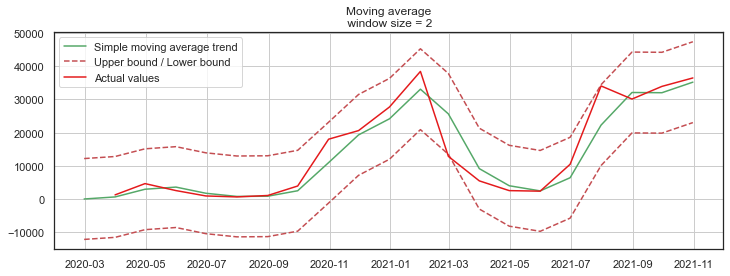

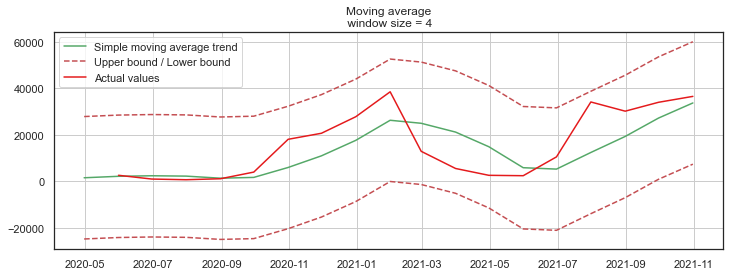

In [94]:
# 1 Month
plot_moving_average(df_1_res.New_cases, 2, plot_intervals=True)

# 3 Months
plot_moving_average(df_1_res.New_cases, 4, plot_intervals=True)


#### Observations:

In both the 1 month and 3 months time-series plots we can see that the simple moving averages are in an uptrend. The actual values are also at the same time in an uptrend. Considering that there is a lag equivilant to the window size (in this case 1 month and 3 months for the charts respectivley) we can confidently predict that the new cases  will contnue to grow in the immidiate future.